# Recommending Your Favorite Manwhas, Mangas, Manhuas with a Machine Learning Approach

Sharath Kannan and Eric Cho

UID: 117174137 and 117287493

# Introduction

Welcome to our cutting-edge recommendation system for manhwas, mangas, and manhuas! Are you tired of spending endless hours searching for your next captivating read in the world of graphic literature? Our advanced machine learning models are here to assist you in discovering hidden gems and popular masterpieces tailored to your unique preferences. In case you are unaware, manhwas are comics created in South Korea, mangas are comics created in Japan, and manhuas are comics created in China. These comics have gained immense popularity worldwide. By leveraging the power of data analysis and machine learning, we have created an intelligent platform that understands your preferences and suggests the most engaging and immersive reading experiences. So, how does our system work? It all starts with you. We invite you to embark on a journey of self-discovery by answering a series of questions that allow us to gain insight into your interests, preferred genres, and narrative themes. Your responses will be carefully analyzed and processed by our state-of-the-art machine learning models, which have been trained on an extensive dataset of manhwas, mangas, and manhuas.

Once we have captured your unique preferences, our models will work their magic, employing advanced pattern recognition techniques and collaborative filtering to match you with manhwas, mangas, and manhuas that align perfectly with your tastes. Whether you're a fan of thrilling action-packed adventures, heartwarming romance, mind-bending mysteries, or thought-provoking dramas, our system has got you covered. We also understand that preferences can evolve and change over time. As you explore the titles recommended to you, our system will continually learn from your interactions, adapting and fine-tuning its suggestions to ensure a personalized experience. The more you engage with our platform, the better it becomes at predicting your future preferences and introducing you to captivating stories that you might have missed otherwise. So, say goodbye to endless searching and let our recommendation system be your guide in the world of manhwas, mangas, and manhuas. Your next immersive and thrilling reading experience is just a few clicks away!

# Recommender System

## Content-based filtering

- Content-based filtering relies on analyzing the characteristics and attributes of the items being recommended. In the context of manhwas, mangas, and manhuas, content-based filtering would involve examining the content itself, such as the genres, themes, and other textual or visual features. 
- The system match content resources to user characteristics. Content-based filtering techniques normally base their predictions on user’s information(Isinkaye et. al, 2015), and then suggests items that have similar attributes to the ones they have enjoyed in the past. 
- For example, if a user has shown a preference for romance and fantasy genres, the content-based filtering algorithm would recommend manhwas, mangas, or manhuas that contain similar elements. 

## Collaborative filtering

- Collaborative filtering recommends items by identifying other users with similar taste; it uses their opinion to recommend items to the active user(Isinkaye et. al, 2015). It works by finding similarities between users or items based on their interactions and preferences. There are two main types of collaborative filtering: user-based and item-based.
- User-based collaborative filtering: This approach finds users who have similar preferences to the target user and recommends items that those similar users have liked(Isinkaye et. al, 2015). For example, if User A and User B have similar reading habits and User B enjoyed a particular manhwa, then the system would recommend that manhwa to User A.
- Item-based collaborative filtering: In this approach, the system identifies similar items based on users' interactions. If User A enjoys a certain manhwa, the system will recommend other manhwas that users with similar tastes have also enjoyed. 

## Hybrid-based filtering

- Hybrid-based filtering combines two or more filtering techniques in different ways in order to increase the accuracy and performance of recommender systems has been proposed(Isinkaye et. al, 2015). By integrating both approaches, the system can leverage the advantages of each method and provide more diverse and accurate recommendations.
- In a hybrid-based filtering system, content-based and collaborative filtering algorithms may work independently or be combined in various ways. For example, the system might use collaborative filtering to identify a set of initial recommendations and then apply content-based filtering to refine those recommendations based on the specific preferences and attributes of the user.
- Hybrid-based filtering allows for flexibility and can be tailored to suit different recommendation scenarios. It addresses some of the weaknesses of individual approaches, offering a more robust and comprehensive recommendation solution

## Dataset

The dataset that we used is a list of manga scrapped by Victor Soreiro in 2022 (link: https://www.kaggle.com/datasets/victorsoeiro/manga-manhwa-and-manhua-dataset)

In [271]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from operator import itemgetter

import warnings
warnings.filterwarnings("ignore")

In [272]:
data = pd.read_csv("data.csv")
data.head()

,title,description,rating,year,tags,cover
0,Salad Days (Tang LiuZang) - Part 2,The second season of Salad Days (Tang LiuZang).,4.7,2021.0,"['BL', 'Manhua', 'Romance', 'Shounen-ai', 'Spo...",https://cdn.anime-planet.com/manga/primary/sal...
1,The Master of Diabolism,As the grandmaster who founded the Demonic Sec...,4.7,2017.0,"['Action', 'Adventure', 'BL', 'Comedy', 'Manhu...",https://cdn.anime-planet.com/manga/primary/the...
2,JoJo's Bizarre Adventure Part 7: Steel Ball Run,"Set in 1890, Steel Ball Run spotlights Gyro Ze...",4.7,2004.0,"['Action', 'Adventure', 'Horror', 'Mystery', '...",https://cdn.anime-planet.com/manga/primary/joj...
3,A Sign of Affection,"Yuki is a typical college student, whose world...",4.7,2019.0,"['Romance', 'Shoujo', 'Slice of Life', 'Disabi...",https://cdn.anime-planet.com/manga/primary/a-s...
4,Moriarty the Patriot,"Before he was Sherlock’s rival, Moriarty fough...",4.7,2016.0,"['Mystery', 'Shounen', 'Detectives', 'England'...",https://cdn.anime-planet.com/manga/primary/mor...


## Feature Engineering and Data Analysis
One of the first things I did was to find out how much data we were dealing with. I discovered that there were 70948 different anime,manhwa,manga and manhua in the entire dataset. There were 6 columns each with different properties such as title,description, rating, year, tags, and cover. My partner decided that the best way to clean the data was to remove the ‘cover’ column since the information was irrelevant. Since there are 70,939 unique items available, we decided to get every single anime, manhwa, manga and manhua from the year 2000 and up since we thought that would be more appropriate for the general population. We also decided to drop every NaN value in either the year or ratings. Then sorting the entire dataset by the year. 

In [273]:
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])
print("There are {} unique manhwa/manga available".format(len(data["title"].unique())))

Number of rows in the dataset: 70948
Number of columns in the dataset: 6
There are 70939 unique manhwa/manga available


In [274]:
useful_data = data.drop(columns=["cover"])
useful_data = useful_data[useful_data["year"] >= 2000]
useful_data = useful_data.sort_values("year")


#dropping manwhas and manhuas
#useful_data = useful_data[useful_data["tags"] in "]

useful_data.head()

,title,description,rating,year,tags
60501,Copy Cat,This entry currently doesn't have a synopsis. ...,NaN,2000.0,"['BL', 'Drama', 'Slice of Life', 'Yaoi']"
30068,Sonna no Koi ja Nai,Chiaki found out that her boyfriend had anothe...,NaN,2000.0,"['Drama', 'Romance', 'Shoujo', 'Collections']"
57167,Maihime Terpsichore,"Late into the school year, Sudo Kumi transfers...",NaN,2000.0,"['Drama', 'Josei', 'Ballet Dancing', 'Dancing']"
59215,Almost Paradise (Debbie MACOMBER),This entry currently doesn't have a synopsis. ...,NaN,2000.0,"['Josei', 'Romance', 'Harlequin', 'Based on a ..."
46087,Easy Writer,Monica has finally gotten her dream job as a r...,NaN,2000.0,"['Comedy', 'Drama', 'Josei', 'Romance', 'Slice..."


Then my partner and I thought that we should have a visualization such as a bar graph to see the most frequent appearing genres in the entire dataset. I decided that the best way to create a simple bar graph was to first create a dictionary on a key value pair, key being the name of genre and value being the number of genres. With that we chose the top 50 most frequent genres and outputted the bar graph. 

In [275]:
tag_column = useful_data["tags"]

for index,row in useful_data["tags"].iteritems():
    row = row[1:-1]
    row = row.replace("'", "").replace(" ", "")
    row = row.split(",")
    useful_data.at[index,"tags"] = row

weed = {}
for tag in useful_data["tags"]:
     for genre in tag:
        if (genre in weed):
            weed[genre] = weed[genre] + 1
        else:
            weed[genre] = 1
            
#print(weed)

In [276]:
N = 50
 
# N largest values in dictionary
# Using sorted() + itemgetter() + items()
weed = dict(sorted(weed.items(), key=itemgetter(1), reverse=True)[:N])
 
# printing result
print("The top N value pairs are " + str(weed))

The top N value pairs are {'Romance': 28058, 'Comedy': 19669, 'Drama': 17042, 'Fantasy': 15179, 'BL': 12347, 'SchoolLife': 11989, 'Action': 11317, 'Yaoi': 9996, 'FullColor': 9668, 'LightNovels': 9287, 'Webtoons': 8871, 'Seinen': 8170, 'SliceofLife': 7653, 'Supernatural': 7472, 'Manhwa': 6861, 'Shoujo': 6677, 'Shounen': 6369, 'Manhua': 5645, 'Adventure': 5471, 'Josei': 5002, 'OneShot': 4452, 'Ecchi': 3572, 'SciFi': 3415, 'ExplicitSex': 3370, 'Historical': 3220, 'PersoninaStrangeWorld': 3134, 'BasedonaWebNovel': 3040, 'Mystery': 3019, 'AdultCouples': 2863, 'Collections': 2751, 'Shounen-ai': 2351, 'BasedonaNovel': 2310, 'WebNovels': 2224, 'Non-HumanProtagonists': 2170, 'Psychological': 2165, 'BasedonaLightNovel': 2065, 'GL': 2010, 'MatureThemes': 2001, 'Horror': 1991, 'MatureRomance': 1898, '4-koma': 1818, 'AdaptedtoAnime': 1802, 'Magic': 1789, 'Isekai': 1788, 'Harem': 1659, 'Harlequin': 1639, 'Royalty': 1587, 'Smut': 1327, 'Shoujo-ai': 1251, 'Demons': 1130}


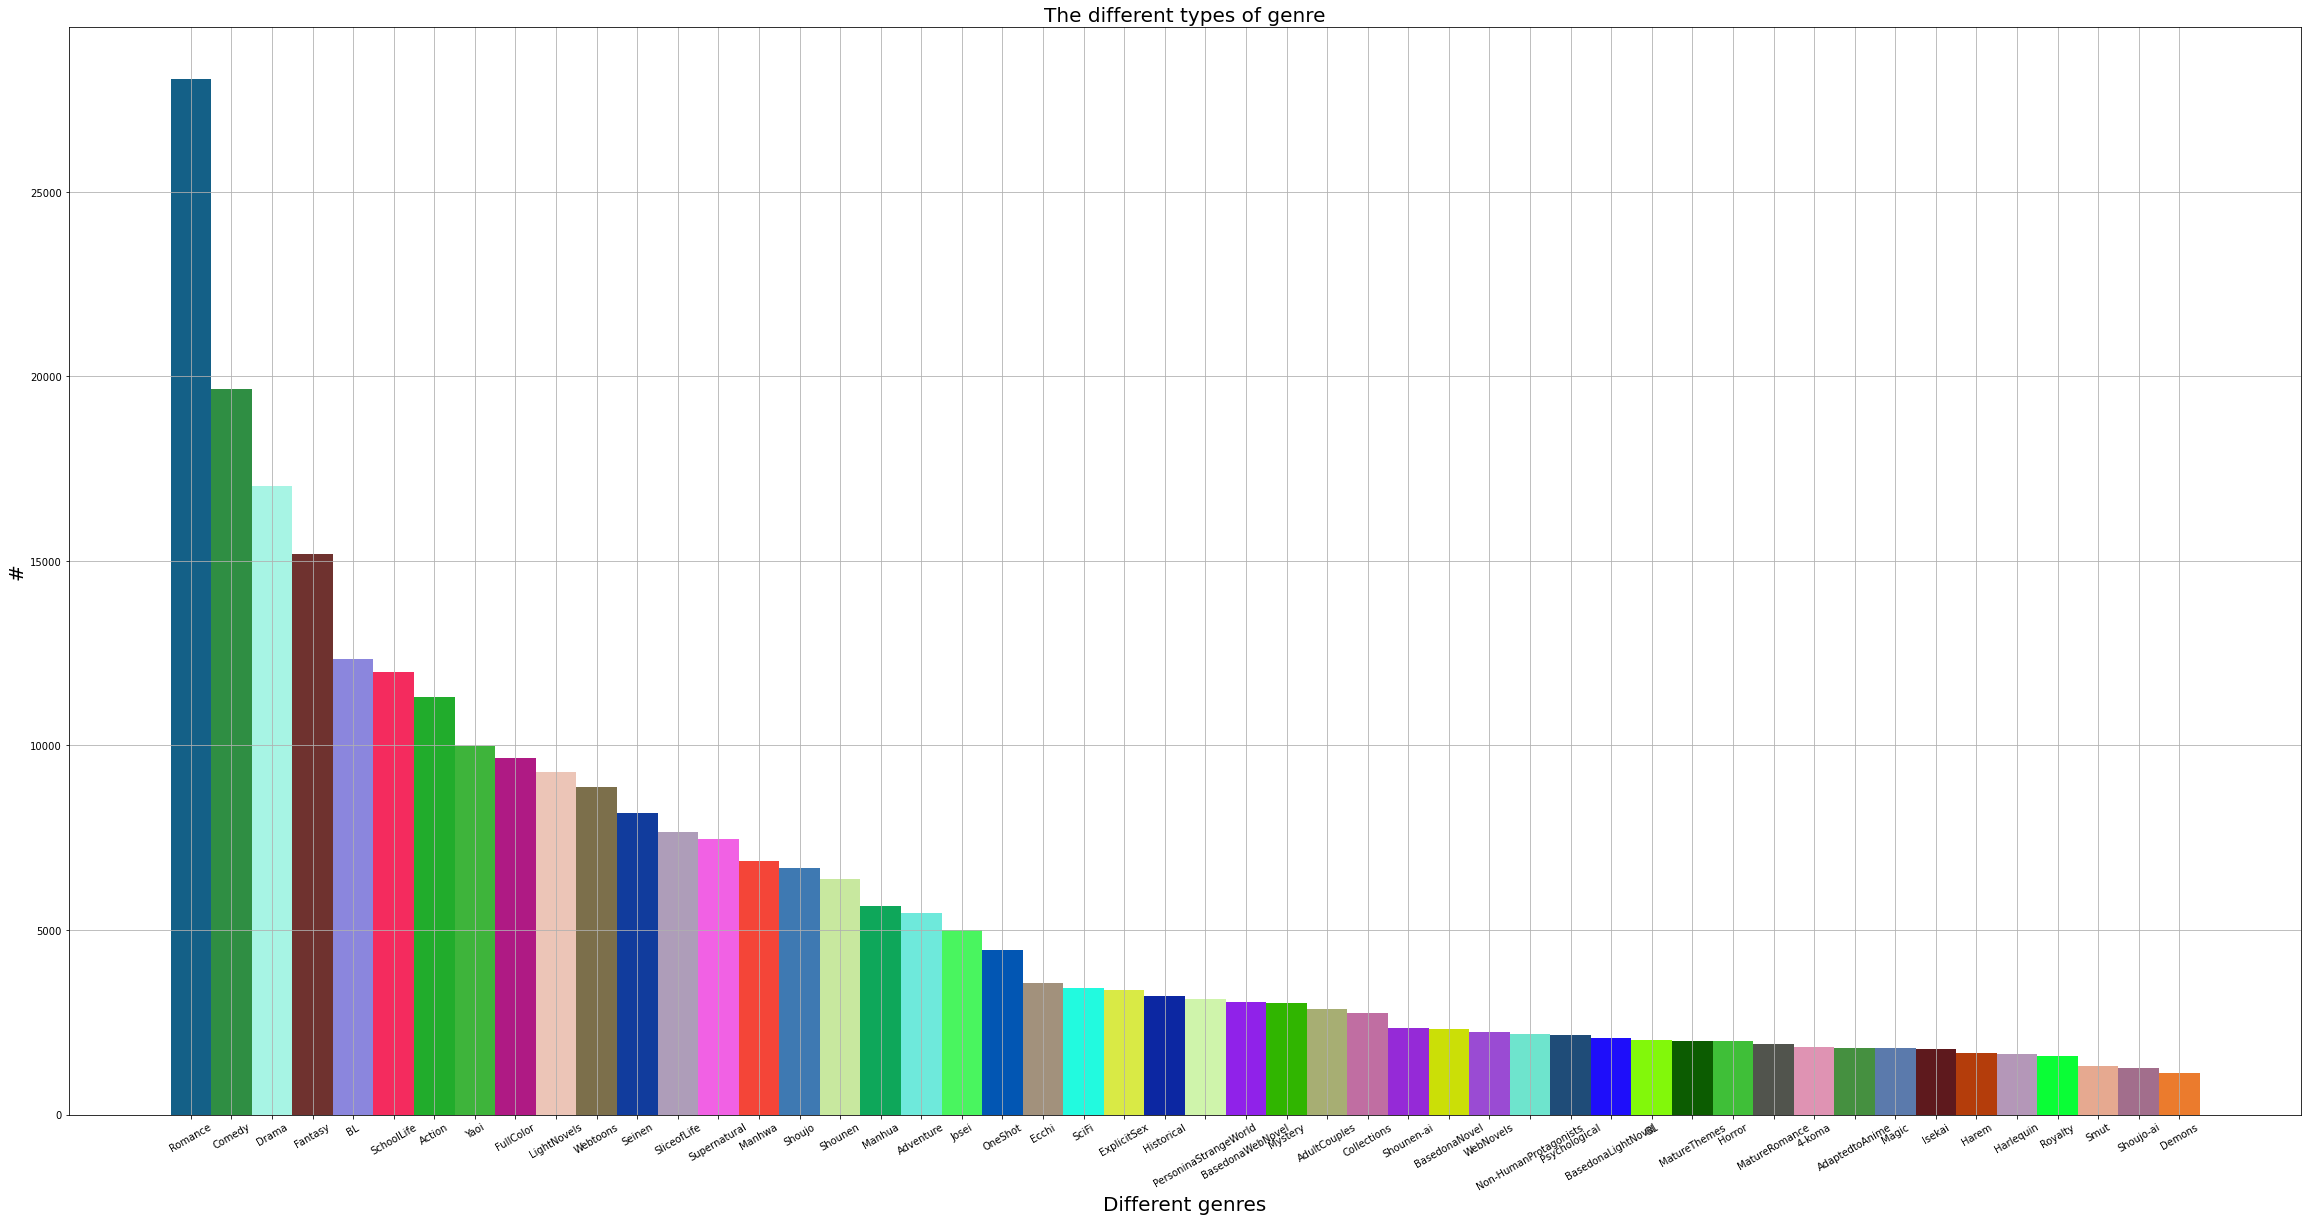

In [277]:
values_list = list(weed.values())

values_array = np.array(values_list)

keys_list = list(weed.keys())

keys_array = np.array(keys_list)

no_of_colors=len(keys_array)
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(no_of_colors)]

bar_plot = pd.DataFrame({"tags":values_array},index = keys_array)
#bar_plot.plot.bar()

colors = color
plt.figure(figsize=(40, 20))
plt.bar(keys_array, values_array, color=colors,width = 1)
plt.xticks(rotation=30)
plt.title('The different types of genre', fontsize=20)
plt.xlabel('Different genres', fontsize=20)
plt.ylabel('#', fontsize=20)
plt.grid(True)
plt.show()

As you can see, the most common tags seem to be romance, comedy, drama, and fantasy. There are a few suspicious tags in here, but we decided to keep them in because they are important factors in generalizing the list of manhwas for a good reccomendation. Next, we decided to one-hot encode the tags column so the data can work with a machine learning model. The function below creates the one-hot-encoded dataset. From there, we appended that dataset to the main dataset and reset the indices. With that, the dataset is ready for reccomendation

In [278]:
# one hot encode 
useful_data.head()
ohctags = {}

for tags in useful_data["tags"]:
    splt = tags
    for wtag in weed.keys():
        if (wtag not in ohctags.keys()):
            ohctags[wtag] = []
        if (wtag in splt):
            ohctags[wtag].append(1)
        else:
            ohctags[wtag].append(0)
            
ohctags_df = pd.DataFrame.from_dict(ohctags)
ohctags_df.head(10)


,Romance,Comedy,Drama,Fantasy,BL,SchoolLife,Action,Yaoi,FullColor,LightNovels,...,4-koma,AdaptedtoAnime,Magic,Isekai,Harem,Harlequin,Royalty,Smut,Shoujo-ai,Demons
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
#combine both into one dataframe!

prep_df = useful_data
#prep_df = prep_df.reset_index()
prep_df = pd.concat([useful_data.reset_index(drop=True), ohctags_df.reset_index(drop=True)], axis=1)
prep_df.head()

,title,description,rating,year,tags,Romance,Comedy,Drama,Fantasy,BL,...,4-koma,AdaptedtoAnime,Magic,Isekai,Harem,Harlequin,Royalty,Smut,Shoujo-ai,Demons
0,Copy Cat,This entry currently doesn't have a synopsis. ...,NaN,2000.0,"[BL, Drama, SliceofLife, Yaoi]",0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Sonna no Koi ja Nai,Chiaki found out that her boyfriend had anothe...,NaN,2000.0,"[Drama, Romance, Shoujo, Collections]",1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Maihime Terpsichore,"Late into the school year, Sudo Kumi transfers...",NaN,2000.0,"[Drama, Josei, BalletDancing, Dancing]",0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Almost Paradise (Debbie MACOMBER),This entry currently doesn't have a synopsis. ...,NaN,2000.0,"[Josei, Romance, Harlequin, BasedonaNovel]",1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Easy Writer,Monica has finally gotten her dream job as a r...,NaN,2000.0,"[Comedy, Drama, Josei, Romance, SliceofLife]",1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using K-NN as the backbone of our Reccomendation System

K-Nearest Neighbors is a machine learning algorithm that uses the distances between feature values to calculate the nearest items in training data X to a sample Y. It algorithm calcualtes the Euclidean Distance between Y and all elements in X, sorts them, and aquires the first K sorted distances. In classification, it lables Y with the most common label of the K sorted disances. In regression, this process is similar. For our case, we thought we could get K good reccomendations for a specific manga, manwha, or manhua by running KNN on the one-hot encoded tag features. In other words, we are using a Content-Based Filtering System to acquire recommendations. We decided to use sklearn's neighbors framework for their Nearest Neighbors model. Since we wanted 10 reccomendations (not including Y itself), we decided to set K to 11.

A small drawback with KNN is that distance calculations can take time, especially if the size of X is massive. Luckily, sklearn's KNN implementation comes with a feature that allows us to skip a few calculations. This algorithm is called "ball tree", which "recursively divides the data into nodes defined by a centroid and radius, such that each point in the node lies within the hyper-sphere defined by [the radius and the centroid]" (sklearn, n.d). This in turn results in fewer distance calculations. With every paramter set, we are finally able to set up the model.

In [280]:
from sklearn.neighbors import NearestNeighbors

# get all the features by themselves as a numpy array
X = ohctags_df.to_numpy()

# implement knn using scipi, find the first k nearest neighbors.
# ball tree is to make sure we dont calculate 67,000 distances 
# we choose 12 to avoid duplicates
knn = NearestNeighbors(n_neighbors=11, algorithm='ball_tree')
nbrs = knn.fit(X)

In [281]:
# code for grabbing a random sample - used for quick testing.
# rand = prep_df.sample()
# Y = (rand.drop(["title", "description", "rating", "year", "tags"], axis=1)).to_numpy()

# This function below prints a readable string representation of the first K reccomendations for Y
def knnrecs(Y):
    Ydat = (Y.drop(labels=["title", "description", "tags", "rating", "year"])).to_numpy()
    distances, indices = nbrs.kneighbors([Ydat])
    #print(indices)
    print("Best Reccomendations if You've Read: " + str(Y["title"]))
    print(str(Y["tags"]))
    print()
    i = 0
    for x in indices[0]:
        row = useful_data.iloc[x]
        title = row["title"]
        desc = row["description"]
        tags = row["tags"]
        if (title != Y["title"]):
            print(str(title))
            print("distance: " + str(distances[0][i]))
            print("tags: " + str(tags))
            print("description: " + str(desc))
            print()
        i += 1
    return(indices[0])

In [282]:
# Let's test this with one of Sharath's favorite mangas!
dsid = prep_df.index[prep_df["title"] == "The Eminence in Shadow"]
Y = prep_df.iloc[dsid[0]]

recs = knnrecs(Y)

Best Reccomendations if You've Read: The Eminence in Shadow
['Action', 'Comedy', 'Fantasy', 'Shounen', 'Isekai', 'Magic', 'MagicSchool', 'OverpoweredMainCharacters', 'Parody', 'PersoninaStrangeWorld', 'Reincarnation', 'SchoolLife', 'Swordplay', 'ExplicitViolence', 'AdaptedtoAnime', 'BasedonaLightNovel']

Villainess: Reloaded! Blowing Away Bad Ends with Modern Weapons
distance: 1.4142135623730951
tags: ['Action', 'Comedy', 'Fantasy', 'Shounen', 'Guns', 'Isekai', 'Magic', 'ModernKnowledge', 'OtomeGame', 'PersoninaStrangeWorld', 'Reincarnation', 'Villainess', 'Violence', 'BasedonaLightNovel']
description: Astrid von Oldenburg is no ordinary four-year-old. She’s a child prodigy with a passion for military technology who now finds herself reincarnated in the world of an otome game she played during her past life. But not as the heroine! As the game’s villainess, she's born with wealth, power, and a fearsome talent for magic. The only problem is that every route leads to her inevitable destr

After developing a function to output an easy-to-read string representation of the results, we decided to test KNN with a manga called "The Eminence of Shadow". As seen above, the distances of each reccomendation appears to increase as we go down. This is expected of the KNN algorithm, so we have successfully aquired the 10 nearest reccomendations for "The Eminence of Shadow". However, there is a problem.

**How do we know that these results are good recommendations?**

## Evaluating Recommendations
In the example above, we noticed that the tags of all reccomendations are very similar to the tags of "The Eminence of Shadow". As we go further down the recommendation list, the similarity in tags start to vanish. Also, when reading the descriptions of the recommended items, we see parallels between the general plot of "The Eminence of Shadow" and the recommendations. The best way to verify the reccomendation is by actually reading the recommendations, but we do not have the time for that. All three methods are decent for evalution, but none of them are rooted in the ground truth. 

After discussing this issue, we decided to modify the way we make recommendations. The best way to validate a model is by comparing a feature's value generated by the machine and value from the ground truth. For classifcation, we look for the loss curve with a loss function. For regression, we would use statistics that compare the generated value to the actual value, such as Root Mean Squared Error.

In a real world setting, a user profile will have the mangas, manwhas, and manhuas that they've read, and a score on whether they've liked it or not. A reccomender system would use this information (as well as information from other users if going for a Collaborative-Filtering approach) to provide reccomendations for the user. So, we decided to simulate our own "user profile" with 25 mangas, manwhas, and manhuas we've read, labelled with 1. We then grab 35 random items in prep_df not already in our "user profile", and label them with a 0.

In [283]:
import re

#Sharath Kannan's List
skidx = []
skidx.append(prep_df.index[prep_df["title"] == "The Eminence in Shadow"][0])
skidx.append(prep_df.index[prep_df["title"] == "Oshi no Ko"][0])
skidx.append(prep_df.index[prep_df["title"] == "Tsukimichi: Moonlit Fantasy"][0])
skidx.append(prep_df.index[prep_df["title"] == "Chainsaw Man"][0])
skidx.append(prep_df.index[prep_df["title"] == "Overlord"][0])
skidx.append(prep_df.index[prep_df["title"] == "The Saga of Tanya the Evil"][0])
skidx.append(prep_df.index[prep_df["title"] == "Kaguya-sama: Love Is War"][0])
skidx.append(prep_df.index[prep_df["title"] == "Reincarnated as a Sword"][0])
skidx.append(prep_df.index[prep_df["title"] == "Black Clover"][0])
skidx.append(prep_df.index[prep_df["title"] == "Dragon Ball Super"][0])
skidx.append(prep_df.index[prep_df["title"] == "Re:ZERO -Starting Life in Another World- Chapter 1: A Day in the Capital"][0])
skidx.append(prep_df.index[prep_df["title"] == "Re:ZERO -Starting Life in Another World- Chapter 2: A Week at the Mansion"][0])
skidx.append(prep_df.index[prep_df["title"] == "Re:ZERO -Starting Life in Another World- Chapter 3: Truth of Zero"][0])
skidx.append(prep_df.index[prep_df["title"] == "Re:ZERO -Starting Life in Another World- Chapter 4: Sanctuary and Witch of Greed"][0])
skidx.append(prep_df.index[prep_df["title"] == "One-Punch Man (Webcomic)"][0])
skidx.append(prep_df.index[prep_df["title"] == "The Quintessential Quintuplets"][0])
skidx.append(prep_df.index[prep_df["title"] == "Classroom of the Elite"][0])
skidx.append(prep_df.index[prep_df["title"] == "Horimiya"][0])
skidx.append(prep_df.index[prep_df["title"] == "Spice and Wolf (Light Novel)"][0])
skidx.append(prep_df.index[prep_df["title"] == "86: Eighty-Six"][0])
skidx.append(prep_df.index[prep_df["title"] == "How a Realist Hero Rebuilt the Kingdom"][0])
skidx.append(prep_df.index[prep_df["title"] == "That Time I Got Reincarnated as a Slime: The Ways of the Monster Nation"][0])
skidx.append(prep_df.index[prep_df["title"] == "That Time I Got Reincarnated as a Slime: Trinity in Tempest"][0])
skidx.append(prep_df.index[prep_df["title"] == "The Rising of the Shield Hero"][0])
skidx.append(prep_df.index[prep_df["title"] == "Goblin Slayer"][0])

# fill out the rest of the dataset.
ld = np.ones(len(skidx))
random_seed = 615
np.random.seed(2129)
# fill rest with random values-0
i = 0
while (i < 35):
    r = np.random.randint(len(prep_df))
    if (r not in skidx):
        skidx = np.append(skidx, r)
        ld = np.append(ld, 0)
        i += 1

sksample = prep_df.iloc[skidx]
sksample["Like_Dislike"] = ld
sksample.head()

,title,description,rating,year,tags,Romance,Comedy,Drama,Fantasy,BL,...,AdaptedtoAnime,Magic,Isekai,Harem,Harlequin,Royalty,Smut,Shoujo-ai,Demons,Like_Dislike
43740,The Eminence in Shadow,"Shadowbrokers are those who go unnoticed, posi...",4.6,2018.0,"[Action, Comedy, Fantasy, Shounen, Isekai, Mag...",0,1,0,1,0,...,1,1,1,0,0,0,0,0,0,1.0
57732,Oshi no Ko,"In the entertainment industry, lying is both y...",4.6,2020.0,"[Drama, Seinen, SliceofLife, Acting, Idols, Ps...",0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
30544,Tsukimichi: Moonlit Fantasy,Misumi Makoto was just a normal high-school st...,4.5,2015.0,"[Action, Adventure, Comedy, Fantasy, Shounen, ...",0,1,0,1,0,...,1,1,1,0,0,0,0,0,0,1.0
43592,Chainsaw Man,Denji's life of poverty is changed forever whe...,4.6,2018.0,"[Action, Fantasy, Horror, Shounen, DarkFantasy...",0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1.0
28152,Overlord,What do you do when your favorite game shuts d...,4.6,2014.0,"[Action, Adventure, Fantasy, DarkFantasy, Demo...",0,0,0,1,0,...,1,1,1,0,0,0,0,0,1,1.0


In [284]:
# Eric Cho's List
manhwa_data = []
manhwa_data.append(prep_df.index[prep_df["title"] == "Nano Machine"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Tower of God - Part 3"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "A Good Day to be a Dog"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Tower of God"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "A Business Proposal"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Positively Yours"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "What's Wrong with Secretary Kim?"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Hold Me Tight"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Weak Hero"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Bastard"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Teenage Mercenary"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Surviving Romance"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Homeless"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Walk on Water"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Second Life Ranker (Novel)"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Light and Shadow"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Odd Girl Out"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Love Shuttle"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Sweet Home"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Positively Yours"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Unholy Blood"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Medical Return"][0])
manhwa_data.append(prep_df.index[prep_df["title"] == "Who Made Me a Princess"][0])

ld = np.ones(len(manhwa_data))

random_seed = 615
np.random.seed(2193)


for i in range(35):
    ran = np.random.randint(len(prep_df))
    if(ran not in manhwa_data):
        manhwa_data = np.append(manhwa_data,ran)
        ld = np.append(ld,0)
        

manhwa_data = prep_df.iloc[manhwa_data]
manhwa_data["Like_Dislike"]=ld
manhwa_data.head()

,title,description,rating,year,tags,Romance,Comedy,Drama,Fantasy,BL,...,AdaptedtoAnime,Magic,Isekai,Harem,Harlequin,Royalty,Smut,Shoujo-ai,Demons,Like_Dislike
57872,Nano Machine,After being held in disdain and having his lif...,4.7,2020.0,"[Action, Adventure, Fantasy, Manhwa, SciFi, We...",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
51958,Tower of God - Part 3,The third season of Tower of God.,4.7,2019.0,"[Action, Adventure, Drama, Fantasy, Manhwa, We...",0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1.0
42249,A Good Day to be a Dog,"Hana is cursed into a dog from her first kiss,...",4.6,2017.0,"[Comedy, Drama, Manhwa, Romance, Webtoons, Adu...",1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
16076,Tower of God,Fame. Glory. Power. Anything in your wildest d...,4.6,2010.0,"[Action, Adventure, Drama, Fantasy, Manhwa, We...",0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1.0
43833,A Business Proposal,Ha-ri made a deal—go on one blind date for her...,4.6,2018.0,"[Comedy, Drama, Manhwa, Romance, Webtoons, Adu...",1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0


Essentially, we've turned this problem into a classification problem. By using a model that can generalize the trends of tags in our "user profile", we can figure out if a manga, manhwa, or manhua is worth recommending to us. This then raises the opportunity to see which classification model preforms the best for recommendation. The three models we will be testing are KNN, Decision Trees, and a Neural Network. The reason for choosing these three is that they seem to be the most popular models in recommendation systems. 

Sharath's taste in manwha, manga, and manhua appears to be the trope of reincarnating in a fantasy world, and prefers manga. Eric's taste appears to be action-heavy and prefers manwha. The goal now is the see if these three models can generalize these trends. With that, we can check if a new manga, manhwa, or manhua is suitable for us.

**By using the model with the least loss, we can run the model with potential items and find the next best manga, manwha, or manhua to enjoy!**

# Finding the Best Model
## K-Nearest Neighbors

Let us start with K-Nearest Neighbors. Once again, we use the sklearn implementation of the model. This time, we wouldn't have to use the "ball tree" algorithm since we are training with 60 values. Brute forcing the distances would be more efficient. We've also used a tecnique called "cross validation" to split our "user profile" data into a training and test set (80% and 20% respectively). With this, we can calculate training and testing loss. This can then tell us if the model is overfitting or underfitting. Having K be 10 might not be as optimal here, so we need to choose the best K value that best generalizes the data. 

An easy way to do this is to compare model loss for different K values. For our loss function, we decided to go with logistic loss. But we've been expirimentign with other functions

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss

# set up Sharath's samples
skX = (sksample.drop(labels=["title", "description", "tags", "rating", "year", "Like_Dislike"], axis=1)).to_numpy()
skY = (sksample["Like_Dislike"]).to_numpy()

# make training/testing set
X_train, X_test, Y_train, Y_test = train_test_split(skX, skY, test_size=0.2, train_size=0.8, random_state=615, shuffle=True)

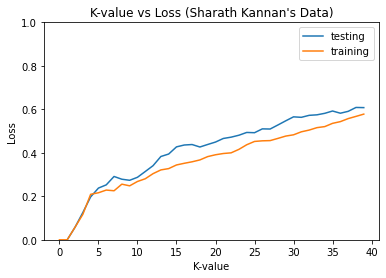

In [286]:
# we train 11 KNN models, starting with 1 and going up by 5 up to 50.
K = np.arange(0,40,1)
K[0] = 1

# find training and testing loss
tr_loss = []
te_loss = []
tr_acc = []
te_acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    knn = knn.fit(X_train, Y_train)
    # score returns mean accuracy of training/testing
    tr_acc.append(knn.score(X_train, Y_train))
    te_acc.append(knn.score(X_test, Y_test))
    tr_loss.append(log_loss(Y_train, knn.predict_proba(X_train)))
    te_loss.append(log_loss(Y_test, knn.predict_proba(X_test)))

# plot loss values
plt.title("K-value vs Loss (Sharath Kannan's Data)")
plt.xlabel("K-value")
plt.ylabel("Loss")

# might remove this
ax = plt.gca()
ax.set_ylim([0.0, 1.0])

plt.plot(K, te_loss, tr_loss)
plt.legend(["testing", "training"])
plt.show()


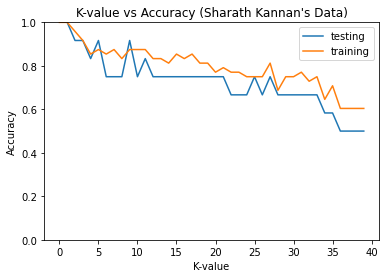

In [287]:
# Accuracy
plt.title("K-value vs Accuracy (Sharath Kannan's Data)")
plt.xlabel("K-value")
plt.ylabel("Accuracy")

# might remove this
ax = plt.gca()
ax.set_ylim([0.0, 1.0])

plt.plot(K, te_acc, tr_acc)
plt.legend(["testing", "training"])
plt.show()

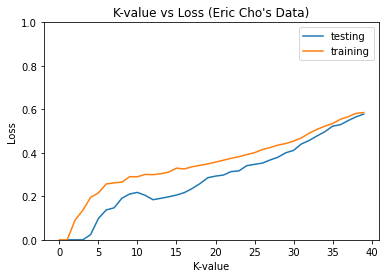

In [288]:
# set up Erics Samples
ecX = (manhwa_data.drop(labels=["title", "description", "tags", "rating", "year", "Like_Dislike"], axis=1)).to_numpy()
ecY = (manhwa_data["Like_Dislike"]).to_numpy()

# make training/testing set
X_train, X_test, Y_train, Y_test = train_test_split(ecX, ecY, test_size=0.2, train_size=0.8, random_state=615, shuffle=True)

# we train 11 KNN models, starting with 1 and going up by 5 up to 50.
K = np.arange(0,40,1)
K[0] = 1

# find training and testing loss
tr_loss = []
te_loss = []
tr_acc = []
te_acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    knn = knn.fit(X_train, Y_train)
    # score returns mean accuracy of training/testing
    tr_acc.append(knn.score(X_train, Y_train))
    te_acc.append(knn.score(X_test, Y_test))
    tr_loss.append(log_loss(Y_train, knn.predict_proba(X_train)))
    te_loss.append(log_loss(Y_test, knn.predict_proba(X_test)))

# plot loss values
plt.title("K-value vs Loss (Eric Cho's Data)")
plt.xlabel("K-value")
plt.ylabel("Loss")

# might remove this
ax = plt.gca()
ax.set_ylim([0.0, 1.0])

plt.plot(K, te_loss, tr_loss)
plt.legend(["testing", "training"])
plt.show()


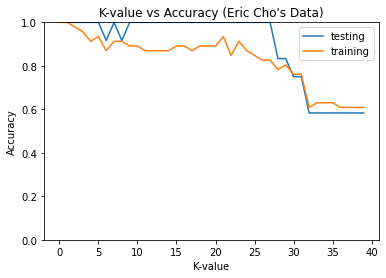

In [289]:
# Accuracy
plt.title("K-value vs Accuracy (Eric Cho's Data)")
plt.xlabel("K-value")
plt.ylabel("Accuracy")

# might remove this
ax = plt.gca()
ax.set_ylim([0.0, 1.0])

plt.plot(K, te_acc, tr_acc)
plt.legend(["testing", "training"])
plt.show()

As expected, as the K value increases, both loss and accuracy decrease. This is because the model is underfitting the data at high K-values, resulting in wrong classifications. We noticed minimal loss for both datasets between the K-values of 0 and 5. The accuracy of the training and testing data for both datasets seems to be following a similar pattern---it is maximized between the K-values of 0 and 5. This tells us that the most optimal K value is within this interval. We see 100% accuracy and 0 loss when K is 1 or 2, but we risk overfitting the model in this case. This means that items that we test with later on have a higher chance of being wrongly classified. 

After careful consideration, we decided to settle with K=3. Below are the accuracies of a 3-NN model trained with our datasets.

In [290]:
# sk with 4
X_train, X_test, Y_train, Y_test = train_test_split(skX, skY, test_size=0.2, train_size=0.8, random_state=615, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=3, algorithm="brute")
knn = knn.fit(X_train, Y_train)

print("Training score (Sharath): " + str(knn.score(X_train, Y_train)))
print("Testing score (Sharath): " + str(knn.score(X_test, Y_test)))
print()

#EC with 4
X_train, X_test, Y_train, Y_test = train_test_split(ecX, ecY, test_size=0.2, train_size=0.8, random_state=615, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=3, algorithm="brute")
knn = knn.fit(X_train, Y_train)

print("Training score (Eric): " + str(knn.score(X_train, Y_train)))
print("Testing score (Eric): " + str(knn.score(X_test, Y_test)))

Training score (Sharath): 0.9166666666666666
Testing score (Sharath): 0.9166666666666666

Training score (Eric): 0.9565217391304348
Testing score (Eric): 1.0


A 91% testing score for Sharath's dataset and a 100% testing score for Eric's dataset are good values for reccomendation. Thus, using KNN to classify a like or a dislike seems like a good idea.

## Decision Trees
Next, we decided to test decision trees. When it comes to training a decisiosn tree, it esesntially looks for the feature with the highest information gain using GINI and splits items in that dataset based on that feature. This recursive process ends when all items in each children have the same class.

The trends in our datasets can be determined on whether or not a certain tag appears, so we assume that a decsision tree would work extremely well to generalize this data and predict a like or dislike. For this, we used sklearn's implementation of a decision tree. Once again, we split our dataset into training and a test set, and trained the model with our training set. We could end the training process early by limiting the height of the tree, but since the there are only 48 items to train, we decided against it. Afterwards, we aquired the accuracy of running the model on the training and testing data. Using a visualization of the data, we can see which features the model prioritized.

In [291]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


skX = (sksample.drop(labels=["title", "description", "tags", "rating", "year","Like_Dislike"], axis=1)).to_numpy()
sky = (sksample["Like_Dislike"]).to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(skX, skY, test_size=0.2, train_size=0.8, random_state=615, shuffle=True)


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Training Accuracy:", clf.score(X_train, Y_train))
print("Testing Accuracy:", clf.score(X_test, Y_test))

Training Accuracy: 1.0
Testing Accuracy: 1.0


[Text(0.5769230769230769, 0.9, 'AdaptedtoAnime <= 0.5\ngini = 0.478\nsamples = 48\nvalue = [29, 19]\nclass = dislike'),
 Text(0.3076923076923077, 0.7, 'BasedonaLightNovel <= 0.5\ngini = 0.219\nsamples = 32\nvalue = [28, 4]\nclass = dislike'),
 Text(0.15384615384615385, 0.5, 'MatureThemes <= 0.5\ngini = 0.069\nsamples = 28\nvalue = [27, 1]\nclass = dislike'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = dislike'),
 Text(0.23076923076923078, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = like'),
 Text(0.46153846153846156, 0.5, 'Action <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = like'),
 Text(0.38461538461538464, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = like'),
 Text(0.5384615384615384, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = dislike'),
 Text(0.8461538461538461, 0.7, 'Action <= 0.5\ngini = 0.117\nsamples = 16\nvalue = [1, 15]\nclass = like'),
 Text(0.7692307692307693, 0.5, 'PersoninaStrangeWorld <= 

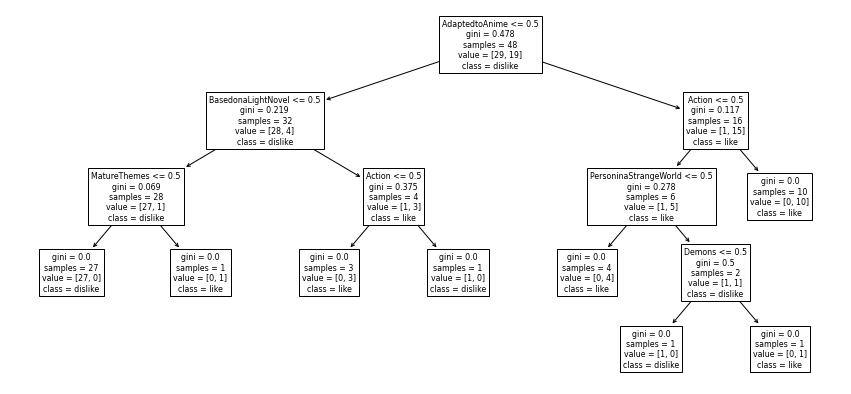

In [292]:
from sklearn.tree import *
#import pydotplus
#from IPython.display import Image
#from six import StringIO

#dot_data = StringIO()
feature_cols = sksample.drop(labels=["title", "description", "tags", "rating", "year","Like_Dislike"], axis=1).columns.tolist()

plt.figure(figsize=(15,7))


plot_tree(clf, feature_names=feature_cols, class_names=["dislike", "like"])
#plot_tree(clf, feature_names=feature_cols)

In [293]:
# Set up with Erics Examples
ecX = (manhwa_data.drop(labels=["title", "description", "tags", "rating", "year", "Like_Dislike"], axis=1)).to_numpy()
ecY = (manhwa_data["Like_Dislike"]).to_numpy()

# make training/testing set
X_train, X_test, Y_train, Y_test = train_test_split(ecX, ecY, test_size=0.2, train_size=0.8, random_state=615, shuffle=True)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Training Accuracy:", clf.score(X_train, Y_train))
print("Testing Accuracy:", clf.score(X_test, Y_test))

Training Accuracy: 1.0
Testing Accuracy: 1.0


[Text(0.4090909090909091, 0.9375, 'Manhwa <= 0.5\ngini = 0.476\nsamples = 46\nvalue = [28, 18]\nclass = dislike'),
 Text(0.3181818181818182, 0.8125, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]\nclass = dislike'),
 Text(0.5, 0.8125, 'Shounen-ai <= 0.5\ngini = 0.298\nsamples = 22\nvalue = [4, 18]\nclass = like'),
 Text(0.4090909090909091, 0.6875, 'FullColor <= 0.5\ngini = 0.245\nsamples = 21\nvalue = [3, 18]\nclass = like'),
 Text(0.18181818181818182, 0.5625, 'Drama <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = dislike'),
 Text(0.09090909090909091, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = like'),
 Text(0.2727272727272727, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = dislike'),
 Text(0.6363636363636364, 0.5625, 'SciFi <= 0.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]\nclass = like'),
 Text(0.45454545454545453, 0.4375, 'ExplicitSex <= 0.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]\nclass = like'),
 Text(0.36363636363636365, 0.3125, 'gini = 0.0\ns

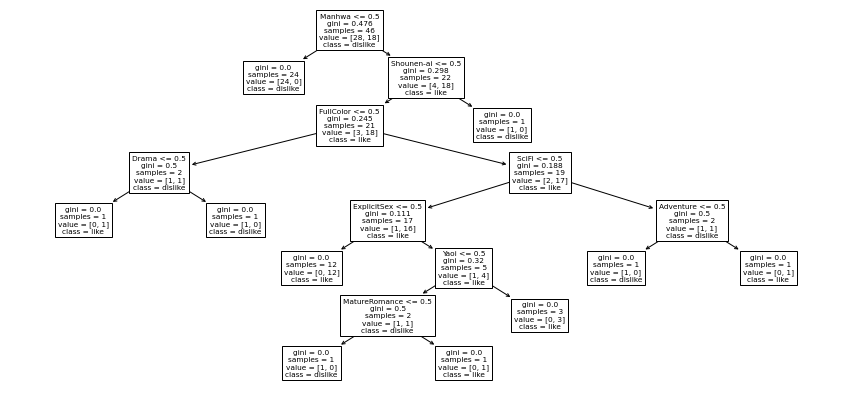

In [294]:
feature_cols = manhwa_data.drop(labels=["title", "description", "tags", "rating", "year","Like_Dislike"], axis=1).columns.tolist()

plt.figure(figsize=(15,7))


plot_tree(clf, feature_names=feature_cols, class_names=["dislike", "like"])
#plot_tree(clf, feature_names=feature_cols)

Something important to note is that the training accuracy for both datasets is 100%. This means that the training data is generalized perfectly. Usually, this means that the model is overfitting the dataset. There is a chance that this occurs with Sharath's dataset as we get a testing accuracy of 83%. Though at the same time, we see a testing accuracy of 100% on Erics dataset. What is the reason for this?

Note that Eric has labelled all the manwha in his list with 1, since he is a manhwa fan. As seen in his decision tree above, the first split is based on the "manhwa" tag. If it is not a manwha, it is immediately labelled with a 0 class. Meanwhile, Sharath's dataset has more variety in the tags, which is why the trees appear more balanced. That said, we came to the conclusion that a decision tree works better for "user profile lists" that have a defined trend in the tags. It doesn't perform as well for lists with more variance.

## Neural Network
As mentioned before, neural networks are becoming popular for reccomendation systems with the advent of big data. The benefit of neural networks is that it is known to classify non-linear distributions with accuracy. Suppose we use a neural network to generalize our "user profile" dataset. 

There are many good rules of thumb to start building a neural network. For us, we decided to choose ReLU as our activation function. The algorithm we chose for backpropagation is stochastic gradeitn decent. A good intial hidden layer size is "2/3 the size of the input layer, plus the size of the output layer" (Krishnan, 2021). In our case, that would be (2/3)*48 + 1 = 33. We experimented with different organizations of these 33 neurons, and we settled with 3 layers: 15 on the 1st, 15 on the 2nd, and 3 on the 3rd. With all that in mind, we set up an MLPClassifier (Multi-Layer-Perceptron) from sklearn and fit our datasets.

In [295]:
from sklearn.neural_network import MLPClassifier

# set up Sharath's samples
skX = (sksample.drop(labels=["title", "description", "tags", "rating", "year", "Like_Dislike"], axis=1)).to_numpy()
skY = (sksample["Like_Dislike"]).to_numpy()

# make training/testing set
X_train, X_test, Y_train, Y_test = train_test_split(skX, skY, test_size=0.2, train_size=0.8, random_state=614, shuffle=True)

# initialize and train neural network
# activation function is ReLU-standard
# loss function is sgd
# learning rate has been set to 0.2 for training
nn = MLPClassifier(hidden_layer_sizes=(15,15,3), activation="relu", solver="sgd", shuffle=True, random_state=614, max_iter=600, verbose=True, learning_rate_init=0.2)
nn = nn.fit(X_train, Y_train)

# see scroes (mean error)
print("\nScores (Mean Accuracy)")
print("test score: " + str(nn.score(X_test, Y_test)))
print("training score: " + str(nn.score(X_train, Y_train)))

Iteration 1, loss = 0.66405658
Iteration 2, loss = 0.62816355
Iteration 3, loss = 0.58852031
Iteration 4, loss = 0.51603694
Iteration 5, loss = 0.43474858
Iteration 6, loss = 0.35646902
Iteration 7, loss = 0.29229925
Iteration 8, loss = 0.23382722
Iteration 9, loss = 0.18127073
Iteration 10, loss = 0.12635842
Iteration 11, loss = 0.08155672
Iteration 12, loss = 0.05028862
Iteration 13, loss = 0.03075169
Iteration 14, loss = 0.01758722
Iteration 15, loss = 0.01025202
Iteration 16, loss = 0.00635454
Iteration 17, loss = 0.00429061
Iteration 18, loss = 0.00298275
Iteration 19, loss = 0.00210838
Iteration 20, loss = 0.00150633
Iteration 21, loss = 0.00109183
Iteration 22, loss = 0.00080513
Iteration 23, loss = 0.00060697
Iteration 24, loss = 0.00046955
Iteration 25, loss = 0.00037554
Iteration 26, loss = 0.00030796
Iteration 27, loss = 0.00025825
Iteration 28, loss = 0.00022203
Iteration 29, loss = 0.00019517
Iteration 30, loss = 0.00017497
Iteration 31, loss = 0.00015953
Iteration 32, los

For 35 iterations, we see the loss of the dataset continously go down, which is expected for a well made neural network. For Sharath's dataset, we see a testing accuracy of 91% and a training accuracy of 100%. This might signify overfitting, but with such a high training accuracy, we believe it should be fine. When it comes to neural networks, the more neurons and layers there are in the hidden layer, the more complex the model gets, and the accuracy should be better. So, we decided to try to double the neurons at each layer and see what we get.

In [296]:
# what if we doubled it!
nn = MLPClassifier(hidden_layer_sizes=(20,20,6), activation="relu", solver="sgd", shuffle=True, random_state=614, max_iter=600, verbose=True, learning_rate_init=0.2)
nn = nn.fit(X_train, Y_train)

# see scroes (mean error)
print("\nScores (Mean Accuracy)")
print("test score: " + str(nn.score(X_test, Y_test)))
print("training score: " + str(nn.score(X_train, Y_train)))

Iteration 1, loss = 0.69842120
Iteration 2, loss = 0.67927610
Iteration 3, loss = 0.65912810
Iteration 4, loss = 0.63718486
Iteration 5, loss = 0.61311979
Iteration 6, loss = 0.58339721
Iteration 7, loss = 0.54399954
Iteration 8, loss = 0.49506397
Iteration 9, loss = 0.44645408
Iteration 10, loss = 0.40350928
Iteration 11, loss = 0.35974043
Iteration 12, loss = 0.31400745
Iteration 13, loss = 0.26929240
Iteration 14, loss = 0.23055452
Iteration 15, loss = 0.19526259
Iteration 16, loss = 0.16177237
Iteration 17, loss = 0.13005466
Iteration 18, loss = 0.10026079
Iteration 19, loss = 0.07391577
Iteration 20, loss = 0.05362966
Iteration 21, loss = 0.03919814
Iteration 22, loss = 0.02823829
Iteration 23, loss = 0.02007347
Iteration 24, loss = 0.01460553
Iteration 25, loss = 0.01083800
Iteration 26, loss = 0.00808354
Iteration 27, loss = 0.00607342
Iteration 28, loss = 0.00460708
Iteration 29, loss = 0.00353540
Iteration 30, loss = 0.00275041
Iteration 31, loss = 0.00217171
Iteration 32, los

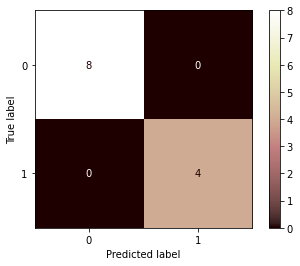

In [297]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for Sharath's data
pred = nn.predict(X_test)
cm = confusion_matrix(Y_test, pred)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap="pink")

As assumed, the testing score accuracy jumped up to 100%. It is also important to note that the runtime of the model does not take that long due to the size of the training dataset. The confusion matrix above also shows us that everything was classified correctly with no false positives or false negatives. So, we decided to use the same neural network build for Erics dataset.

In [298]:
ecX = (manhwa_data.drop(labels=["title", "description", "tags", "rating", "year", "Like_Dislike"], axis=1)).to_numpy()
ecY = (manhwa_data["Like_Dislike"]).to_numpy()

# make training/testing set
X_train, X_test, Y_train, Y_test = train_test_split(ecX, ecY, test_size=0.2, train_size=0.8, random_state=615, shuffle=True)

nn = MLPClassifier(hidden_layer_sizes=(20,20,6), activation="relu", solver="sgd", shuffle=True, random_state=614, max_iter=600, verbose=True, learning_rate_init=0.2)
nn = nn.fit(X_train, Y_train)

# see scroes (mean error)
print("\nScores (Mean Accuracy)")
print("test score: " + str(nn.score(X_test, Y_test)))
print("training score: " + str(nn.score(X_train, Y_train)))

Iteration 1, loss = 0.68933202
Iteration 2, loss = 0.66470290
Iteration 3, loss = 0.63535866
Iteration 4, loss = 0.60549905
Iteration 5, loss = 0.57569762
Iteration 6, loss = 0.53604651
Iteration 7, loss = 0.47560466
Iteration 8, loss = 0.39678589
Iteration 9, loss = 0.32356104
Iteration 10, loss = 0.26112361
Iteration 11, loss = 0.20836340
Iteration 12, loss = 0.17205988
Iteration 13, loss = 0.14783393
Iteration 14, loss = 0.13021786
Iteration 15, loss = 0.11168324
Iteration 16, loss = 0.09012525
Iteration 17, loss = 0.07342062
Iteration 18, loss = 0.06490571
Iteration 19, loss = 0.05699885
Iteration 20, loss = 0.04935083
Iteration 21, loss = 0.04064668
Iteration 22, loss = 0.02847394
Iteration 23, loss = 0.01560167
Iteration 24, loss = 0.00860033
Iteration 25, loss = 0.00520570
Iteration 26, loss = 0.00332491
Iteration 27, loss = 0.00230007
Iteration 28, loss = 0.00174464
Iteration 29, loss = 0.00139190
Iteration 30, loss = 0.00111719
Iteration 31, loss = 0.00087734
Iteration 32, los

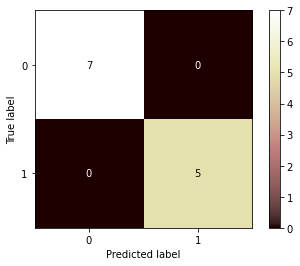

In [299]:
# confusion matrix for Erics data
pred = nn.predict(X_test)
cm = confusion_matrix(Y_test, pred)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap="pink")

Again, we see a 100% in training and testing accuracy. The confusion matrix also shows us that there are no false positives or false negatives. The neural network does a better job in generalizing datasets when there is a defined trend as well as datasets where there is a little more variance. We thought that a neural network would need more data points to train and completely generalize the dataset, but that doesn't seem to be the case.

Due to the high accuracy and low runtime of the neural network on our "reading lists", we think that the best model to reccomend a user to their next manga, manhwa, or manhua is a **neural network.**

# Conclusion
In conclusion, our machine learning project has successfully developed a recommendation system that assists users in discovering the best manhwas, mangas, and manhuas best suited to their taste. Throughout the project, we explored various techniques and considerations to enhance the accuracy and personalization of our recommendations. One important future modification that we will be considering is incorporating the ratings and the years correlated with each of the comics. By considering user ratings, we would be able to factor the collective opinions of the readership, giving prominence to highly rated works and potentially influencing the recommendations. This will help us create a better system that can help users discover popular titles they have never heard of.

Furthermore, although we implemented content-based techniques in our recommendation system, we acknowledge the potential benefits of exploring alternative models such as Support Vector Machine (SVM). SVM is known for its ability to handle high-dimensional feature spaces and is effective at classification tasks. Integrating SVM into our system could provide an additional perspective for generating accurate and diverse recommendations.

Although we did not include every single machine learning model in our project to test the variety of results, **my partner and I decided that a Neural Network model might be the best choice.** This is because the model achieved 100% accuracy for both lists that my partner and I created. This would mean that the Neural Network model is best for generalization and is fantastic for the average reader.

To further enhance our recommendation system, we can acquire multiple user lists by conducting surveys. By gathering data from a diverse range of users with varying preferences, we can enrich our training dataset and enable broader coverage of genres, art styles, and narrative themes. Incorporating these user lists into our system would allow us to fine-tune our recommendations and account for the unique preferences of different user segments.

Lastly, employing a hybrid filtering method allows for the combination of strengths from both content-based and collaborative filtering. By integrating both approaches, we can leverage the advantages of each method and create a versatile recommendation system. This hybrid approach could further improve recommendation accuracy by considering the attributes of the items being recommended.

In summary, our machine learning project has developed a sophisticated recommendation system that takes into account user preferences, and the potential for alternative models like SVM. Additionally, by acquiring multiple user lists and exploring hybrid filtering methods, we can enhance the personalization and accuracy of our recommendations. Through our efforts, we aim to guide users towards their next captivating read in the vast world of manhwas, mangas, and manhuas, ensuring an immersive and tailored experience for every reader.

## Works Cited

Isinkaye, F. O., Folajimi, Y. O., Ojokoh, B. A., (2015). Recommendation systems: Principles, Methods and Evaluation. Egyptian Informatics Journal. 16(3), 261-273, DOI: https://doi.org/10.1016/j.eij.2015.06.005


Krisnan, S., (2021). How do determine the number of layers and neurons in the hidden layer? Geek Culture. https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3


Scikit Learn. (2011). Nearest Neighbors. https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-neighbors